In [77]:
%matplotlib inline
import requests
import tweepy
import json
import cnfg
from pymongo import MongoClient
from requests_oauthlib import OAuth1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

config = cnfg.load(".twitter_config")

In [3]:
auth = tweepy.OAuthHandler(config['consumer_key'], 
                            config['consumer_secret'])
auth.set_access_token(config['access_token'], 
                      config['access_token_secret'])
api = tweepy.API(auth)

In [4]:
# irmak_tweets = api.user_timeline("frrmack", count=10)
# results = tweepy.Cursor(api.search, q='#pydata').items(200)

In [130]:
df = pd.DataFrame.from_csv("congressional_data/congress-legislators/legislators-current.csv", index_col=None)

In [131]:
df.keys()

Index([u'last_name', u'first_name', u'birthday', u'gender', u'type', u'state', u'district', u'party', u'url', u'address', u'phone', u'contact_form', u'rss_url', u'twitter', u'facebook', u'facebook_id', u'youtube', u'youtube_id', u'bioguide_id', u'thomas_id', u'opensecrets_id', u'lis_id', u'cspan_id', u'govtrack_id', u'votesmart_id', u'ballotpedia_id', u'washington_post_id', u'icpsr_id', u'wikipedia_id'], dtype='object')

In [136]:
df['birth_year'] = pd.DatetimeIndex(df.birthday).year

In [143]:
import datetime
datetime.date.today().year
df['age'] = datetime.date.today().year - df.birth_year

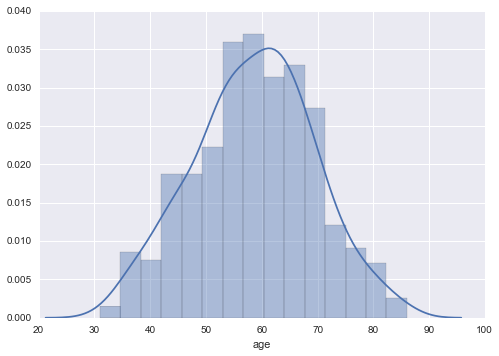

In [276]:
sns.distplot(df.age)
plt.savefig('congress_age_breakdown')

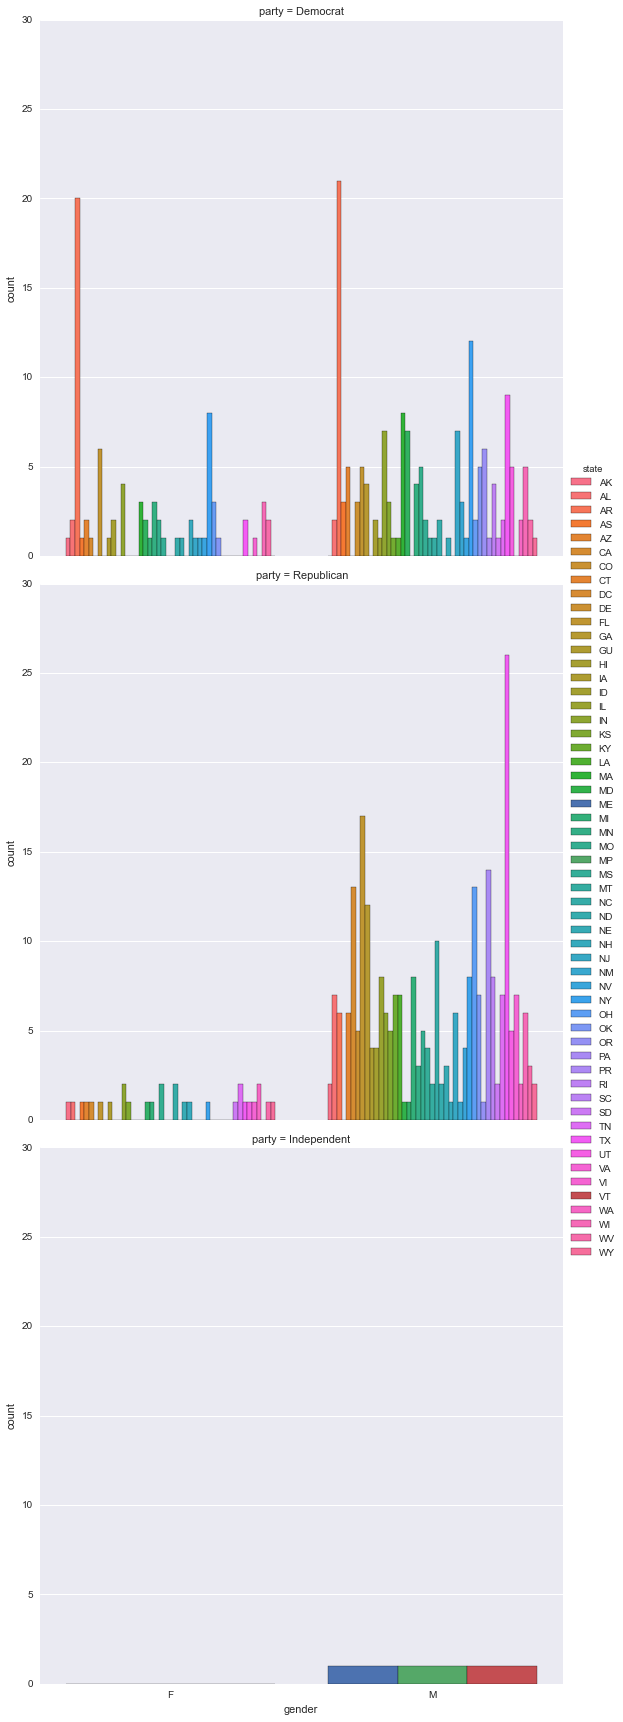

In [275]:
df['gender_F'] = pd.get_dummies(df.gender)['F']

sns.factorplot('gender', data=df, row='party', hue='state', size=8,
               row_order=['Democrat','Republican','Independent'])

plt.savefig('congress_gender_breakdown')

In [259]:
client = MongoClient()
db = client.legislation
legislators = db.legislators
tweets = db.tweets

In [58]:
twitter_ids = legislators.find({'twitter':{'$ne':''}},{'last_name':1, 'first_name':1, 'twitter':1})

In [263]:
# twitter_ids.next()['twitter']

In [273]:
twitter_ids.rewind()
[str(i['twitter']) for i in twitter_ids]

['SenSherrodBrown',
 'SenatorCantwell',
 'SenatorCardin',
 'SenatorCarper',
 'SenBobCasey',
 'SenBobCorker',
 'SenFeinstein',
 'SenOrrinHatch',
 'McCaskillOffice',
 'SenatorMenendez',
 'SenBillNelson',
 'SenSanders',
 'SenStabenow',
 'SenatorTester',
 'SenWhitehouse',
 'SenJohnBarrasso',
 'SenatorWicker',
 'SenAlexander',
 'SenThadCochran',
 'SenatorCollins',
 'JohnCornyn',
 'SenatorDurbin',
 'SenatorEnzi',
 'GrahamBlog',
 'InhofePress',
 'McConnellPress',
 'SenJeffMerkley',
 'SenJackReed',
 'SenatorRisch',
 'SenPatRoberts',
 'SenatorSessions',
 'SenatorShaheen',
 'SenatorTomUdall',
 'MarkWarner',
 'SenCoonsOffice',
 'Sen_JoeManchin',
 'Robert_Aderholt',
 'SenatorBaldwin',
 'RepLouBarletta',
 'RepJoeBarton',
 'RepKarenBass',
 'RepBecerra',
 'CongressmanDan',
 'SenBennetCo',
 'RepGusBilirakis',
 'RepRobBishop',
 'SanfordBishop',
 'RepDianeBlack',
 'MarshaBlackburn',
 'BlumenauerMedia',
 'SenBlumenthal',
 'RoyBlunt',
 'SpeakerBoehner',
 'JohnBoozman',
 'RepBoustany',
 'SenatorBoxer',
 'R

In [239]:
twitter_handle = 'SenSherrodBrown'
results = api.user_timeline(twitter_handle, count=10)

In [240]:
tweets_df = pd.DataFrame([i._json for i in results])

In [243]:
tweets_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,in_reply_to_user_id_str,lang,place,possibly_sensitive,retweet_count,retweeted,source,text,truncated,user
0,None,None,Wed May 20 14:34:52 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,13,False,None,601033351210921984,601033351210921984,...,None,en,None,False,23,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","The goal is to shine a light on #TPP, for the ...",False,"{u'follow_request_sent': False, u'profile_use_..."
1,None,None,Tue May 19 19:31:13 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,11,False,None,600745544127029248,600745544127029248,...,None,en,None,False,24,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",If Congress is going to #FastTrack 1 of our la...,False,"{u'follow_request_sent': False, u'profile_use_..."
2,None,None,Tue May 19 15:29:49 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,10,False,None,600684793827827713,600684793827827713,...,None,en,None,False,13,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Foreign competitors are cheating the system w/...,False,"{u'follow_request_sent': False, u'profile_use_..."
3,None,None,Mon May 18 22:31:49 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,21,False,None,600428605286514689,600428605286514689,...,None,en,None,False,22,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","We owe it to workers, who are going to have th...",False,"{u'follow_request_sent': False, u'profile_use_..."
4,None,None,Mon May 18 19:02:42 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,20,False,None,600375980562210816,600375980562210816,...,None,en,None,False,28,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Going to Senate Floor to speak about #TPP amen...,False,"{u'follow_request_sent': False, u'profile_use_..."


In [267]:
tweets_df.keys()

Index([u'contributors', u'coordinates', u'created_at', u'entities', u'extended_entities', u'favorite_count', u'favorited', u'geo', u'id', u'id_str', u'in_reply_to_screen_name', u'in_reply_to_status_id', u'in_reply_to_status_id_str', u'in_reply_to_user_id', u'in_reply_to_user_id_str', u'lang', u'place', u'possibly_sensitive', u'retweet_count', u'retweeted', u'source', u'text', u'truncated', u'user'], dtype='object')

In [271]:
tweets_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,in_reply_to_user_id_str,lang,place,possibly_sensitive,retweet_count,retweeted,source,text,truncated,user
0,None,None,Wed May 20 14:34:52 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,13,False,None,601033351210921984,601033351210921984,...,None,en,None,False,23,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","The goal is to shine a light on #TPP, for the ...",False,"{u'follow_request_sent': False, u'profile_use_..."
1,None,None,Tue May 19 19:31:13 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,11,False,None,600745544127029248,600745544127029248,...,None,en,None,False,24,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",If Congress is going to #FastTrack 1 of our la...,False,"{u'follow_request_sent': False, u'profile_use_..."
2,None,None,Tue May 19 15:29:49 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,10,False,None,600684793827827713,600684793827827713,...,None,en,None,False,13,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Foreign competitors are cheating the system w/...,False,"{u'follow_request_sent': False, u'profile_use_..."
3,None,None,Mon May 18 22:31:49 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,21,False,None,600428605286514689,600428605286514689,...,None,en,None,False,22,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","We owe it to workers, who are going to have th...",False,"{u'follow_request_sent': False, u'profile_use_..."
4,None,None,Mon May 18 19:02:42 +0000 2015,"{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,20,False,None,600375980562210816,600375980562210816,...,None,en,None,False,28,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Going to Senate Floor to speak about #TPP amen...,False,"{u'follow_request_sent': False, u'profile_use_..."


In [247]:
tweets_df[['created_at','favorite_count','retweet_count','text']].head()

,created_at,favorite_count,retweet_count,text
0,Wed May 20 14:34:52 +0000 2015,13,23,"The goal is to shine a light on #TPP, for the ..."
1,Tue May 19 19:31:13 +0000 2015,11,24,If Congress is going to #FastTrack 1 of our la...
2,Tue May 19 15:29:49 +0000 2015,10,13,Foreign competitors are cheating the system w/...
3,Mon May 18 22:31:49 +0000 2015,21,22,"We owe it to workers, who are going to have th..."
4,Mon May 18 19:02:42 +0000 2015,20,28,Going to Senate Floor to speak about #TPP amen...


In [257]:
twitter_ids.rewind()
dear_mongo = []
for i in twitter_ids:
    twitter_handle = i['twitter']
    results = api.user_timeline(twitter_handle, count=10)
    dear_mongo.extend([{"handle": twitter_handle, "created":i.created_at, "favorites":i.favorite_count, 
                   "retweets":i.retweet_count, "text":i.text} for i in results])
tweets.insert_many(dear_mongo)

TweepError: [{u'message': u'Rate limit exceeded', u'code': 88}]